# Question 1:
- Learn and understand Zipf’s Law. 
- Pick any file (or files) in NLTK package. 
- Prove if Zipf’s Law works in Natural Language or not. 
- REQUIREMNTS: (Must Do) 
	- Use ’glob’ to open and read file. If read multiple files use LOOP to achieve. 
	- Create at least one function and one lambda function. 
	- Save your data as an CSV file contains (Word, Rank, Frequency) with TITLE and Sort it by RANK. 
	- Open your CSV file, generate a log-log figure according to the data you saved. 
	- Write a conclusion at the end of your code base on your figure. 
- (Optional) Use ‘matplotlib’ to generate a log-log figure in your code. 
    - Before Submission Please Check: 
    - Do I have Markdown TITLE at very beginning? 
    - Do I use the required method to open and read files? 
    - Do I use 'def' and ‘lambda’ in my code? 
    - Do I write your code in small blocks instead of in one big block? 
    - Do I have proper outputs or comments to show your progress? 
    - Do I add TITLE in your CSV file? Is the data well sorted? 
    - Do I create the figure with right form(log-log) in your csv file? 
    - Do I give the conclusion at the end of your code? 



In [1]:
# importing all the packages needed
import json
import glob
import os
import shutil
import re
import nltk
import string
import math
import csv
import matplotlib.pyplot as plt
import sys
import re
import xlsxwriter
import random
from operator import itemgetter
from termcolor import colored, cprint

In [2]:
path = os.getcwd() # specifying the path where the files to be created
configfiles = glob.glob(r"C:\Users\chint\AppData\Roaming\nltk_data\corpora\gutenberg\*.txt") # reading all the given json files from this path

In [3]:
colors = ("magenta", "yellow", "cyan") 
# generates colors in colors tuple randomly for highlightinh the text which is used in printing the Conclusion part to highlight some values 
def get_on_color():
    global colors
    return "on_" + colors[random.randint(0,len(colors)-1)]

In [4]:
# removes all the punctuations and numbers from the json data
def getWords(text):
    return re.compile('[A-Za-z]+').findall(text) # finds all words starting with A-Za-Z to filter out

In [5]:
# makes all the words to lowercase
def dataProcessing(data):
    totalWords = getWords(data) # calling getwords() function to get words
    lowerWords = []
    for word in totalWords:
        lowerWords.append(word.lower()) #making the data lower
    return lowerWords # returning the lowered list 

In [6]:
# for the lowered words calculating the frequency and rank
def frequencyRankCalculation(totalWords):
    uniqueWords = {}
    for word in totalWords: # Loop all the words to calculate frequency
            if word not in uniqueWords:
                uniqueWords[word] = 1   # if the word is not in the dictionary adding the word and setting a count
            else:
                uniqueWords[word] += 1  # incrementing the count if it's already presnt
    sortedFreq = sorted(uniqueWords.items(), key=itemgetter(1),reverse=True) # sorting the words in descending order
    listOfWords = [list(elem) for elem in sortedFreq] # converting the dictionary to list
    for count,elem in enumerate(listOfWords,1): # finding the rank for the elements
        elem.append(count) # adding to list
    return listOfWords # returning the list of all calculated freq and rank
    

In [7]:
# calculating the zipf law r*freq, A*N
def zipfFormula(list1, totalNoWords):
    for element in list1: 
        probabilityOfR = element[1]/totalNoWords # finding prob(r)
        element.append(probabilityOfR)  # adding to the list
        A = element[2]*element[3] # calculating A value(r*prob(r))
        element.append(A) # adding to the list
        rFreq = element[1]*element[2] # finding r* frq
        element.append(rFreq) # adding to the list
        aMulN = element[4]*totalNoWords # finding A*N
        element.append(aMulN) # adding to the list
        logRank = math.log(element[2]) # finding log(rank) for plotting graph
        element.append(logRank) # adding to the list
        logFreq = math.log(element[1]) # finding log(freq) for plotting graph
        element.append(logFreq) # adding to the list  
    return list1 # returning the calculated list

In [8]:
# calculating the top 20% words from the list of unique words to prove zipf law
def top20PercentWords(listOfWords, lengthOfDictionary):
    twentyPercent = lambda x : round((20 * lengthOfDictionary)/100) # finding 20% of the length of the unique words 
    total = twentyPercent(lengthOfDictionary) # calling the twentypercent function
    sumOfFreq = 0 # assigning sum as 0
    length = len(listOfWords) # getting the length of the list  
    for i in range(0,length): # iterating through length of list
        if listOfWords[i][2] <= total: # to check whether the frequency of the list has reached the calculated 20% value
            sumOfFreq = sumOfFreq + listOfWords[i][1] # until the condition is false the frequencies are added
    return sumOfFreq # returning the frequency

In [9]:
# main function which calls all other functions to complete the statistical calculation of zipf's formula
def gutenbergFile(configfiles):
    allFilesZipf = {}
    eightyTwentyRule = {}
    for file in configfiles: # iterating through the list of json files
        with open(file) as txt_file: # opening the file
            fileName = os.path.basename(file) # extracting the json file name to identify which file
            data = txt_file.read() # reading the json data
            totalWords = dataProcessing(data) # this function returns the lowercase words list
            totalWordsLen = lambda x: len(x) # returns length of totalWords list
            lengthOfRawData = totalWordsLen(totalWords) # calling the above function
            listOfWords = frequencyRankCalculation(totalWords) # this function returns the freq, rank calculated list
            zipfLaw = zipfFormula(listOfWords, len(totalWords)) # this function returns the zipf formula proving
            totalSortedLen = lambda listOfWords: len(listOfWords) # returns length of totalWords list
            lengthOfDictionary = totalSortedLen(listOfWords) # calling the above function
            if fileName not in allFilesZipf:  # if the word is not in the dictionary adding the word and setting a count
                    allFilesZipf[fileName] = zipfLaw
    return allFilesZipf # returns the zipf formula calculated list 

In [10]:
# another main function which calls all other functions to prove the 80/20 rule
def eightyTwentyRule(configfiles): 
    allFilesZipf = {}
    eightyTwentyRule = {}
    for file in configfiles: # iterating through the list of json files
        with open(file) as txt_file: # opening the file
            fileName = os.path.basename(file) # extracting the json file name to identify which file
            data = txt_file.read() # reading the json data
            totalWords = dataProcessing(data) # this function returns the lowercase words list
            totalWordsLen = lambda x: len(x) # returns length of totalWords list
            lengthOfRawData = totalWordsLen(totalWords) # calling the above function
            listOfWords = frequencyRankCalculation(totalWords) # this function returns the freq, rank calculated list
            totalSortedLen = lambda listOfWords: len(listOfWords) # returns length of totalWords list
            lengthOfDictionary = totalSortedLen(listOfWords) # calling the above function
            sumOfFreq = top20PercentWords(listOfWords,lengthOfDictionary) # returns the words list which occupies top 20 %
            eightyTwenty = (sumOfFreq/lengthOfRawData)*100 # diving with length of raw data to get the value of zipf's law above or equal 80% or not
            if fileName not in eightyTwentyRule: # if the word is not in the dictionary adding the word and setting a count
                eightyTwentyRule[fileName] = eightyTwenty
    return eightyTwentyRule # returns the 80/20 value dictionary

In [11]:
def csvFile(filename, gutenberg):
    with open(os.path.join(path + '\zipflaw.csv'), 'a') as outcsv:   
    #configure writer to write standard csv file
        writer = csv.writer(outcsv, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL, lineterminator='\n')
        csv.field_size_limit(100)
        for key,value in gutenberg.items():
            if key == filename:
                writer.writerow(['The Word Rank Frequency for the file:',key])
                writer.writerow(['Word', 'Frequency', 'Rank'])
                for each in value:
                    writer.writerow([each[0], each[1], each[2]])

In [12]:
# writing the word rank and frequency to a csv file for inputted file name
def csvCreation(filename,gutenberg):
    csvPath = os.path.join(path + '\\' + 'zipflaw.csv') # for exporting the records to csv file at the mentioned path
    if os.path.exists(csvPath): # if file already present 
        os.remove(csvPath) # remove it
        csvFile(filename, gutenberg) # calling csv function to create a csv file with the records
    else:
        csvFile(filename, gutenberg) # calling csv function to create a csv file with the records

In [13]:
# printing the conclusion whether the zipf's law is holding or not
def conclusion(filename):
    csvCreation(filename,gutenberg) # calling this function to create csv file
    eigthy20 = eightyTwentyRule(configfiles) # getting the 80/20 calculated dict
    rule =  round(eigthy20[filename], 2) # getting the value for the inputted filename
    print(colored("Conclusion:\n", 'green'))
    if rule < 80.0: # if the value is below 80.0 then the printing zipf law fails
        print(colored("Zipf's Law does not hold true for this file", 'green'),colored(filename, 'magenta'), colored("because,\n",'green'))
        print(colored("According to '80/20' rule, though the data is linearly distributed as displayed in above graph, the highest frequency words are very minimal in this file.\n", 'green'))
        print(colored("So the top '20%' of words holds only ", 'green'), colored(rule, 'red'),colored("of complete words in the file not '80%' or above\n", 'green'))
        print(colored("Therefore '80/20' rule fails for this file", 'green'))
    else: # otherwise zipf law holds true
        print(colored("Zipf's Law hold's true for this file ", 'green'), colored(filename, 'magenta'), colored("because,\n", 'green'))
        print(colored("According to '80/20' rule, the data is linearly distributed.\n", 'green'))
        print(colored("And the top '20%' of words holds", 'green'), colored(rule, 'blue'), colored("of complete words in the file which is above",'green'), colored("80%", 'blue'), '\n')
        print(colored("Therefore '80/20' rule perfectly proves for this file", 'green', get_on_color()))

In [14]:
# excel file creation for images
def output(filename, sheet, imagesList):
    # Create a workbook and add a worksheet.
    workbook = xlsxwriter.Workbook(filename) 
    worksheet = workbook.add_worksheet(sheet) 
    
    # specifying the header format
    header_format = workbook.add_format()
    header_format.set_font_name('Calibri')
    header_format.set_align('center')
    header_format.set_align('vcenter')
    header_format.set_border()
    header_format.set_bold()
    header_format.set_size(14)
    
    # setting the cloumn width
    worksheet.set_column('A:A', 50)
    
    # giving image titles
    col1_Name =  "Zipf's Law graph against Rank and Frequency "
    col2_Name =  "Zipf's Law graph against log(Rank) and log(Frequency) "
    worksheet.write(0, 0, col1_Name, header_format)
    worksheet.write(0, 8, col2_Name, header_format)
    
    # Starting point of cell. 
    row = 1
    col = 0
    # Iterate over the data and write it out row by row.
    for n in imagesList:
        worksheet.insert_image(row, col, n)
        col += 5
        
    workbook.close() # closing the workbook

In [15]:
# for plotting graph and writing conclusion
def graphWithMatplotlib(gutenberg, filename):
    x = [] # x axis for first graph
    y = [] # y axis for first graph
    a = [] # x axis for second graph
    b = [] # y axis for second graph
    imagesList = [] # to carry two image files
    for key,value in gutenberg.items(): # iterating through the dict to get the passed filename value
        if key == filename: # checking whether the key matches the file name
            for each in value: # if yes iterating through the list of values of file
                a.append(each[2]) # appeding the rank to the x-axis
                b.append(each[1]) # appending freq to y-axis
                x.append(each[7]) # appending log(rank) to x-axis
                y.append(each[8]) # appending log(freq) to y-axis
                
    # for graph plotting(first graph)
    plt.xlabel('Rank') # specifying x-axis lable
    plt.ylabel('Frequency') # specifying y-axis lable
    plt.title("Gutenberg Words Frequency vs rank") # specifying title of graph
    plt.grid(True) # making grid as true
    plt.xlim( 0, 10000 )    # set the xlim to xmin, xmax
    plt.ylim( 0, 4000 )    # set the xlim to xmin, xmax
    freqRank = plt.scatter(a,b,20,[1,0,1]) # plotting the graph
    imgPath1 = os.path.join(path + '\\'+ filename + 'fig1' + ".jpeg") # getting the image path
    plt.savefig(imgPath1) # saving the graph as jpeg at previously mention path
    imagesList.append(imgPath1) # appending the image to the list
    plt.show() # graph displays here
    
    # for exporting the image to excel file at the mentioned path
    excelPath = os.path.join(path + '\\' + 'gutenbergGraphs.xlsx') 
    
    # for graph plotting(second graph)
    plt.xlabel('log (Rank)') # specifying x-axis lable
    plt.ylabel('log (Frequency)') # specifying y-axis lable
    plt.title("ZIPF'S LAW") # specifying title of graph
    plt.grid(True) # making grid as true
    plt.xlim( 0, 9 )    # set the xlim to xmin, xmax
    plt.ylim( 0, 9 )    # set the xlim to xmin, xmax
    logRankFrq = plt.scatter(x,y,20,[1 , 0, 0]) # plotting the graph
    imgPath2 = os.path.join(path + '\\'+ filename + 'fig2' + ".jpeg") # getting the image path
    plt.savefig(imgPath2) # saving the graph as jpeg at previously mentioned path
    imagesList.append(imgPath2)  # appending the image to the list
    plt.show() # graph displays here
    
    # calling the function to export the images to excel files
    output(excelPath, filename , imagesList)
    # calling the conclusion function to print conclusion
    conclusion(filename)

In [16]:
gutenberg = gutenbergFile(configfiles) # calling the gutenberg function 

In [17]:
# iterating through the list of items to prve zipf formula
for key,value in gutenberg.items(): 
    print("Proving Zipf's Law Formula")
    print("r * freq", "=", "A * N")
    print("-------------------------------\n")
    print("File Name:", key, '\n')
    for each in value[0:3]:
        print(each[5], "=" ,round(each[6]))
    print("\n")

Proving Zipf's Law Formula
r * freq = A * N
-------------------------------

File Name: shakespeare-caesar.txt 

627 = 627
1158 = 1158
1599 = 1599


Proving Zipf's Law Formula
r * freq = A * N
-------------------------------

File Name: bible-kjv.txt 

64023 = 64023
103392 = 103392
104010 = 104010


Proving Zipf's Law Formula
r * freq = A * N
-------------------------------

File Name: austen-persuasion.txt 

3329 = 3329
5616 = 5616
8403 = 8403


Proving Zipf's Law Formula
r * freq = A * N
-------------------------------

File Name: blake-poems.txt 

439 = 439
696 = 696
438 = 438


Proving Zipf's Law Formula
r * freq = A * N
-------------------------------

File Name: carroll-alice.txt 

1642 = 1642
1744 = 1744
2187 = 2187


Proving Zipf's Law Formula
r * freq = A * N
-------------------------------

File Name: austen-emma.txt 

5242 = 5242
10408 = 10408
14691 = 14691


Proving Zipf's Law Formula
r * freq = A * N
-------------------------------

File Name: melville-moby_dick.txt 

1443

In [18]:
# inpufile to be passed as anyone the graph and csv will be created for that file
print(colored("Please take the inputfilename value as anyone of file, copy with .txt below: \n", 'magenta'))
print(colored("austen-emma.txt, austen-persuasion.txt, austen-sense.txt,bible-kjv.txt, blake-poems.txt\n", 'blue'))
print(colored("bryant-stories.txt, burgess-busterbrown.txt, carroll-alice.txt, chesterton-ball.txt\n", 'blue'))
print(colored("chesterton-brown.txt, chesterton-thursday.txt, edgeworth-parents.txt, melville-moby_dick.txt, milton-paradise.txt\n", 'blue'))
print(colored("shakespeare-caesar.txt, shakespeare-hamlet.txt, shakespeare-macbeth.txt, whitman-leaves.txt", 'blue'))

Please take the inputfilename value as anyone of file, copy with .txt below: 

austen-emma.txt, austen-persuasion.txt, austen-sense.txt,bible-kjv.txt, blake-poems.txt

bryant-stories.txt, burgess-busterbrown.txt, carroll-alice.txt, chesterton-ball.txt

chesterton-brown.txt, chesterton-thursday.txt, edgeworth-parents.txt, melville-moby_dick.txt, milton-paradise.txt

shakespeare-caesar.txt, shakespeare-hamlet.txt, shakespeare-macbeth.txt, whitman-leaves.txt


carroll-alice.txt


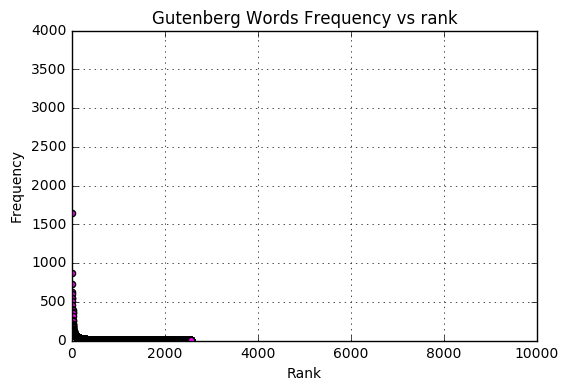

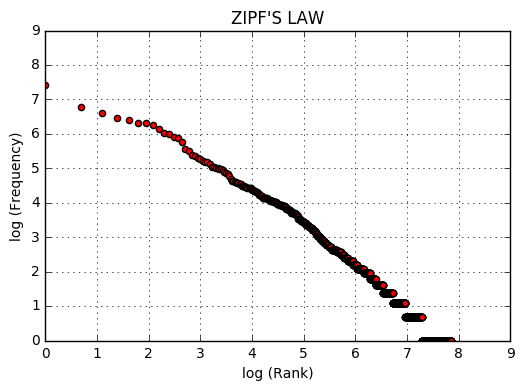

Conclusion:

Zipf's Law hold's true for this file  carroll-alice.txt because,

According to '80/20' rule, the data is linearly distributed.

And the top '20%' of words holds 84.87 of complete words in the file which is above 80% 

Therefore '80/20' rule perfectly proves for this file


In [19]:
# PLEASE PROVIDE YOUR INPUT GUTENBERG FILE NAME WITH FILE EXTENSION IN THE BELOW INPUTBOX FOR WHICH ZIPF'S LAW TO BE CHECKED
# EXAMPLE: blake-poems.txt
inputFilename = ''
graphWithMatplotlib(gutenberg, input(inputFilename)) # to generate graph csv and conclusion for user input file 